In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics

In [2]:
#Reading data from loan.csv
df = pd.read_csv('loan.csv')

/home/rahulg/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Summary
**Advice from Course Instructor**
- Pick either of the columns: loan-amt or funded-amnt invested to study the data
- 
**To Check**
- What is the column telling about default or probability of default? 

**Ideas**
- There can be multiple ids for the same member_id


**Some Ideas for Univariate Analysis**
- You can check which rows are different for funded_amnt and loan_amnt : this tells when Bank decided to reduce loan
- acc_now_delinq: no of accounts in which the member is delinquent / not paying
- annual_inc: We want to see effect of annual income on repaying the loan
- annual_inc_joint, dti
- application_type
- avg_cur_bal
- bc_util
- delinq_2yrs
- delinq_amnt, emp_length, 
- 

### Data Understanding

In [3]:
#To get values
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#To get column list
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
#To get shape of data
df.shape

(39717, 111)

In [6]:
#to describe data frame
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
#Checking the percentage of the null values
df.loc[:,df.isnull().sum()/len(df.index)*100>90].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   mths_since_last_record          2786 non-null   float64
 1   next_pymnt_d                    1140 non-null   object 
 2   mths_since_last_major_derog     0 non-null      float64
 3   annual_inc_joint                0 non-null      float64
 4   dti_joint                       0 non-null      float64
 5   verification_status_joint       0 non-null      float64
 6   tot_coll_amt                    0 non-null      float64
 7   tot_cur_bal                     0 non-null      float64
 8   open_acc_6m                     0 non-null      float64
 9   open_il_6m                      0 non-null      float64
 10  open_il_12m                     0 non-null      float64
 11  open_il_24m                     0 non-null      float64
 12  mths_since_rcnt_il              

## Data Cleaning

In [8]:
#Dropping the columns which are more than 90% Null
df= df.loc[:,~(df.isnull().sum()/len(df.index)*100>90)]

In [9]:
df.shape

(39717, 55)

In [10]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [11]:
df.isnull().sum()/len(df.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Among the remaining columns, mths_since_last_delinq has the highest nulls: 64%. Also it is a customer behaviour column. Hence, dropping this column.

In [12]:
#dropping mths_since_last_delinq column
df = df.drop('mths_since_last_delinq', axis=1)
df.shape

(39717, 54)

Among the remaining columns, desc has 32% nulls, and also is needed only if we do data mining. As this is outside the scope of the assignment, we are the dropping this column.

In [13]:
#Dropping description column
df = df.drop('desc', axis=1)
df.shape

(39717, 53)

In [14]:
#Checking Null percentage
df.isnull().sum()/len(df.index)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

**The following Columns can be dropped as they are customer behaviour columns:** url, delinq_2yrs, revol_bal, revol_util, earliest_cr_line, inq_last_6mths, pub_rec, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, last_pymnt_d, last_credit_pull_d 

In [15]:
#Dropping Customer behaviur column
df = df.drop(['url', 'delinq_2yrs', 'revol_bal', 'revol_util', 'earliest_cr_line', 'inq_last_6mths', 'pub_rec', 'total_acc', 'initial_list_status','out_prncp', 'out_prncp_inv',  'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee','last_pymnt_d','last_credit_pull_d'], axis=1)

**The following columns have not relevant data for our Exploratory Data Analysis:** 
recoveries, collection_recovery_fee, last_pymnt_amnt, collections_12_mths_ex_med, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens [8 columns]

In [16]:
#Dropping Irelevant columns
df = df.drop(['recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],axis=1)

In [17]:
df.shape

(39717, 27)

**Further Analysis of Columns**

**Removing the columns having the same values in all the rows**: These columns have been removed because they do not provide any useful information for analysis.<br>
The following columns have the same data for all rows: <br>
1. acc_now_delinq: all Zeros data
2. policy_code: all ones data
3. pymnt_plan: all data is 'n'
4. application_type: all data is INDIVIDUAL only

In [18]:
#Dropping columns with same data
df = df.drop(['acc_now_delinq','policy_code','pymnt_plan', 'application_type'],axis=1)
df.shape

(39717, 23)

**Removing the columns which are not needed for the Exploratory data analysis:** 
1. member_id: This can be removed because we are considering 'id' instead (each transaction is considered unique)
2. funded_amnt & funded_amnt_inv: These can be removed because we are considering the amount the borrower has requested for the analysis (in the column 'loan_amnt')
3. title: This can be removed because we will be considering the column: 'purpose' for the exploratory data analysis as it is the non-null categorical data provided by the borrower to describe the purpose of the loan.

In [19]:
#Removing irrelavant columns
df = df.drop(['member_id','funded_amnt','funded_amnt_inv','title'],axis=1)
df.shape

(39717, 19)

In [20]:
#Checking column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_title            37258 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  zip_code             39717 non-null 

In [21]:
#Checking null percentage
df.isnull().sum()/len(df.index)*100

id                     0.000000
loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.191303
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
open_acc               0.000000
dtype: float64

**Removing the column: emp_title:** As there is 6% null data in this column, and the variable is distributed such that we are unable to derive any outcome from this. Hence, we are removing this column.

In [22]:
#Dropping emp_title
df = df.drop(['emp_title'],axis=1)
df.shape

(39717, 18)

In [23]:
df.isnull().sum()/len(df.index)*100

id                     0.00000
loan_amnt              0.00000
term                   0.00000
int_rate               0.00000
installment            0.00000
grade                  0.00000
sub_grade              0.00000
emp_length             2.70665
home_ownership         0.00000
annual_inc             0.00000
verification_status    0.00000
issue_d                0.00000
loan_status            0.00000
purpose                0.00000
zip_code               0.00000
addr_state             0.00000
dti                    0.00000
open_acc               0.00000
dtype: float64

In [24]:
df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

### Dealing with Null Values

In [25]:
#Removing rows with values having null emp_length
df = df[~(df['emp_length'].isnull())]

In [26]:
df.isnull().sum()/len(df.index)*100

id                     0.0
loan_amnt              0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
zip_code               0.0
addr_state             0.0
dti                    0.0
open_acc               0.0
dtype: float64

In [27]:
df.shape

(38642, 18)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38642 non-null  int64  
 1   loan_amnt            38642 non-null  int64  
 2   term                 38642 non-null  object 
 3   int_rate             38642 non-null  object 
 4   installment          38642 non-null  float64
 5   grade                38642 non-null  object 
 6   sub_grade            38642 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       38642 non-null  object 
 9   annual_inc           38642 non-null  float64
 10  verification_status  38642 non-null  object 
 11  issue_d              38642 non-null  object 
 12  loan_status          38642 non-null  object 
 13  purpose              38642 non-null  object 
 14  zip_code             38642 non-null  object 
 15  addr_state           38642 non-null 

In [29]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,open_acc
0,1077501,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,3
1,1077430,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,3
2,1077175,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2
3,1076863,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,10
4,1075358,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,15


**Outlier Treatment of Loan amount and annual income**

<AxesSubplot:>

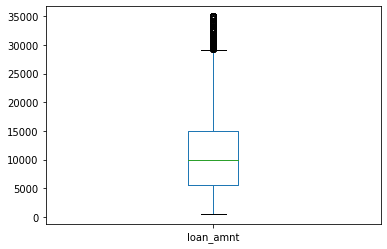

In [30]:
#Boxplot of loan_amnt
df["loan_amnt"].plot.box()

No exttreme outliers in loan_amnt

<AxesSubplot:>

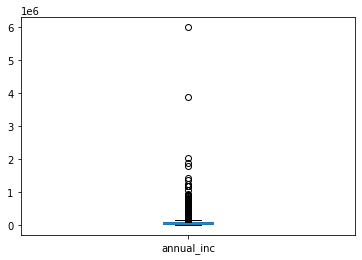

In [31]:
df["annual_inc"].plot.box()

In [32]:
#Removing extreme outliers for annual_inc
df=df.loc[(df["annual_inc"]<=df["annual_inc"].quantile(0.99))]

<AxesSubplot:>

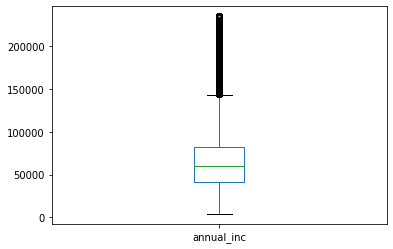

In [33]:
df.loc[:,["annual_inc"]].plot.box()

In [34]:
df.shape

(38257, 18)

### Column term: Removing months and converting to int64

In [35]:
#Removing month text from term
df['term'] = df['term'].str.replace('months','')

In [36]:
#Changing dtatype of term to int
df.term = df.term.astype('int64')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38257 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38257 non-null  int64  
 1   loan_amnt            38257 non-null  int64  
 2   term                 38257 non-null  int64  
 3   int_rate             38257 non-null  object 
 4   installment          38257 non-null  float64
 5   grade                38257 non-null  object 
 6   sub_grade            38257 non-null  object 
 7   emp_length           38257 non-null  object 
 8   home_ownership       38257 non-null  object 
 9   annual_inc           38257 non-null  float64
 10  verification_status  38257 non-null  object 
 11  issue_d              38257 non-null  object 
 12  loan_status          38257 non-null  object 
 13  purpose              38257 non-null  object 
 14  zip_code             38257 non-null  object 
 15  addr_state           38257 non-null 

### Column int_rate: Remove % and make float type

In [38]:
#Treating interest rate
df['int_rate'] = df['int_rate'].str.replace('%','').astype('float64')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38257 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38257 non-null  int64  
 1   loan_amnt            38257 non-null  int64  
 2   term                 38257 non-null  int64  
 3   int_rate             38257 non-null  float64
 4   installment          38257 non-null  float64
 5   grade                38257 non-null  object 
 6   sub_grade            38257 non-null  object 
 7   emp_length           38257 non-null  object 
 8   home_ownership       38257 non-null  object 
 9   annual_inc           38257 non-null  float64
 10  verification_status  38257 non-null  object 
 11  issue_d              38257 non-null  object 
 12  loan_status          38257 non-null  object 
 13  purpose              38257 non-null  object 
 14  zip_code             38257 non-null  object 
 15  addr_state           38257 non-null 

### Column emp_length: Convert to int so that you can then categorize this easily

In [40]:
df['emp_length'] = df['emp_length'].str.replace('< 1 year','1')

In [41]:
df['emp_length'] = df['emp_length'].str.replace(' years','')

In [42]:
df['emp_length'] = df['emp_length'].str.replace(' year','')

In [43]:
df['emp_length'] = df['emp_length'].str.replace('+','')

In [44]:
df['emp_length'].value_counts()

10    8740
1     7767
2     4344
3     4060
4     3412
5     3257
6     2209
7     1759
8     1462
9     1247
Name: emp_length, dtype: int64

In [45]:
df['emp_length'] = df['emp_length'].astype('int64')

In [46]:
df['emp_length'].value_counts()

10    8740
1     7767
2     4344
3     4060
4     3412
5     3257
6     2209
7     1759
8     1462
9     1247
Name: emp_length, dtype: int64

**Steps to create the bins for emp_length**

We will be converting the data of employment length in bings Here, we will be binning in three categories
Low - 0-5, Medium - 5-10, 10+ high

### Column issue_d: Extract month and year from this column

In [47]:
df['issue_month'] = df['issue_d'].apply(lambda x: x.split('-')[0])

In [48]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,open_acc,issue_month
0,1077501,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,3,Dec
1,1077430,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,3,Dec
2,1077175,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,Dec
3,1076863,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,10,Dec
4,1075358,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,15,Dec


In [49]:
df['issue_month'].value_counts()

Dec    4294
Nov    4004
Oct    3746
Sep    3507
Aug    3417
Jul    3341
Jun    3157
May    2885
Apr    2739
Mar    2603
Jan    2306
Feb    2258
Name: issue_month, dtype: int64

In [50]:
df['issue_year'] = df['issue_d'].apply(lambda x: int(x.split('-')[1]))

In [51]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,open_acc,issue_month,issue_year
0,1077501,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,3,Dec,11
1,1077430,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,3,Dec,11
2,1077175,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,Dec,11
3,1076863,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,10,Dec,11
4,1075358,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,15,Dec,11


In [52]:
df['issue_year'].value_counts()

11    20692
10    11101
9      4665
8      1552
7       247
Name: issue_year, dtype: int64

In [53]:
#df['issue_mon2']=pd.to_datetime(df['ArrivalDate'], format='%Y-%m-%d')

#To remove Current status and to update numerical values
df = df.loc[~(df["loan_status"]=='Current')]
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x=='Charged Off' else 0)

### Column loan_status: Removing all rows with current

In [54]:
#To remove Current status and to update numerical values
df = df.loc[~(df["loan_status"]=='Current')]
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x=='Charged Off' else 0)

In [55]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,open_acc,issue_month,issue_year
0,1077501,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,0,credit_card,860xx,AZ,27.65,3,Dec,11
1,1077430,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,1,car,309xx,GA,1.00,3,Dec,11
2,1077175,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,0,small_business,606xx,IL,8.72,2,Dec,11
3,1076863,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,0,other,917xx,CA,20.00,10,Dec,11
5,1075269,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,0,wedding,852xx,AZ,11.20,9,Dec,11


In [56]:
df['loan_status'].value_counts()

0    31813
1     5360
Name: loan_status, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37173 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37173 non-null  int64  
 1   loan_amnt            37173 non-null  int64  
 2   term                 37173 non-null  int64  
 3   int_rate             37173 non-null  float64
 4   installment          37173 non-null  float64
 5   grade                37173 non-null  object 
 6   sub_grade            37173 non-null  object 
 7   emp_length           37173 non-null  int64  
 8   home_ownership       37173 non-null  object 
 9   annual_inc           37173 non-null  float64
 10  verification_status  37173 non-null  object 
 11  issue_d              37173 non-null  object 
 12  loan_status          37173 non-null  int64  
 13  purpose              37173 non-null  object 
 14  zip_code             37173 non-null  object 
 15  addr_state           37173 non-null 

In [58]:
df['emp_length_bin'] = pd.cut(df['emp_length'], bins=[0,3,7,10],precision = 0)

In [59]:
df['emp_length_bin'].value_counts()

(0, 3]     15849
(7, 10]    10988
(3, 7]     10336
Name: emp_length_bin, dtype: int64

**Definition of bins** <br>
Here, low = (0,3] <br>
medium = (3,7] <br>
high = 7+

In [60]:
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], bins=[0,5000,10000,15000,20000,40000],precision = 0)

In [61]:
df['loan_amnt_bin'].value_counts()

(5000, 10000]     12388
(0, 5000]          9021
(10000, 15000]     7502
(15000, 20000]     4222
(20000, 40000]     4040
Name: loan_amnt_bin, dtype: int64

In [62]:
df['int_rate_bin'] = pd.cut(df['int_rate'], bins=[5,10,15,20,25],precision = 0)

In [63]:
df['int_rate_bin'].value_counts()

(10, 15]    17720
(5, 10]     11746
(15, 20]     6975
(20, 25]      732
Name: int_rate_bin, dtype: int64

In [64]:
df['annual_inc'].max()

235000.0

In [65]:
df['annual_inc_bin'] = pd.cut(df['annual_inc'], bins=[0,40000,80000,120000,160000,200000,240000],precision = 0)

In [66]:
df['annual_inc_bin'].value_counts()

(40000, 80000]      18506
(0, 40000]           9139
(80000, 120000]      6772
(120000, 160000]     1917
(160000, 200000]      648
(200000, 240000]      191
Name: annual_inc_bin, dtype: int64

In [67]:
df['dti_bin'] = pd.cut(df['dti'], bins=[0,10,20,30],precision = 0)

In [68]:
df['dti_bin'].value_counts()

(10, 20]    17906
(0, 10]     12112
(20, 30]     6989
Name: dti_bin, dtype: int64

In [69]:
df['open_acc_bin'] = pd.cut(df['open_acc'], bins=[0,10,20,30,40,50],precision = 0)

In [70]:
df['open_acc_bin'].value_counts()

(0, 10]     24811
(10, 20]    11673
(20, 30]      660
(30, 40]       26
(40, 50]        3
Name: open_acc_bin, dtype: int64

In [71]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,open_acc,issue_month,issue_year,emp_length_bin,loan_amnt_bin,int_rate_bin,annual_inc_bin,dti_bin,open_acc_bin
0,1077501,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,...,27.65,3,Dec,11,"(7, 10]","(0, 5000]","(10, 15]","(0, 40000]","(20, 30]","(0, 10]"
1,1077430,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,...,1.00,3,Dec,11,"(0, 3]","(0, 5000]","(15, 20]","(0, 40000]","(0, 10]","(0, 10]"
2,1077175,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,...,8.72,2,Dec,11,"(7, 10]","(0, 5000]","(15, 20]","(0, 40000]","(0, 10]","(0, 10]"
3,1076863,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,...,20.00,10,Dec,11,"(7, 10]","(5000, 10000]","(10, 15]","(40000, 80000]","(10, 20]","(0, 10]"
5,1075269,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,...,11.20,9,Dec,11,"(0, 3]","(0, 5000]","(5, 10]","(0, 40000]","(10, 20]","(0, 10]"


### Univariate Analysis

In [72]:
sns.set(rc={'figure.figsize':(10,10)})
#function to plot default rate corresponding to each category
def univariate(col,xName=None):
    result = df.groupby([col])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status')
    p = sns.barplot(x=col, y='loan_status', data=df, estimator=np.mean,palette='Set1',ci=None,order=result[col])
    p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
    if xName is None:xName=col
    plt.xlabel(xName, fontsize=18)
    plt.ylabel('Default Rate', fontsize=16)
    plt.title('Effect of {} on Default Rate'.format(xName))
    plt.show()

In [73]:
#function to plot frequency distribution of each category
def frequencyDist(col,xName=None):
    freq = pd.DataFrame((df[col].value_counts()/len(df)*100))
    ax = sns.barplot(x=freq.index,y=col,data=freq)
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
    if xName is None:xName=col
    plt.xlabel(xName, fontsize=18)
    plt.ylabel('Frequency %', fontsize=16)
    plt.title('Frequency Distribution of {}'.format(xName))
    plt.show()

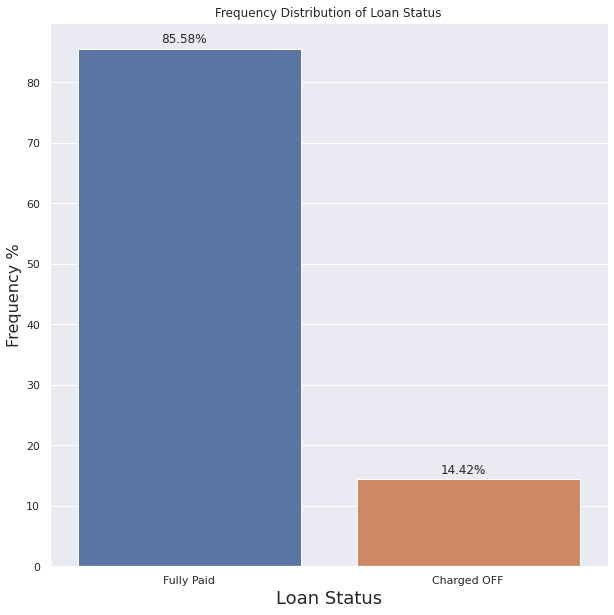

In [74]:
#Frequency Distribution of Loan Status
loan = pd.DataFrame((df["loan_status"].value_counts()/len(df)*100))
loan["status"] = ['Fully Paid', 'Charged OFF']
ax=sns.barplot(x="status",y="loan_status",data=loan)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1))
plt.xlabel('Loan Status', fontsize=18)
plt.ylabel('Frequency %', fontsize=16)
plt.title('Frequency Distribution of Loan Status')
plt.show()

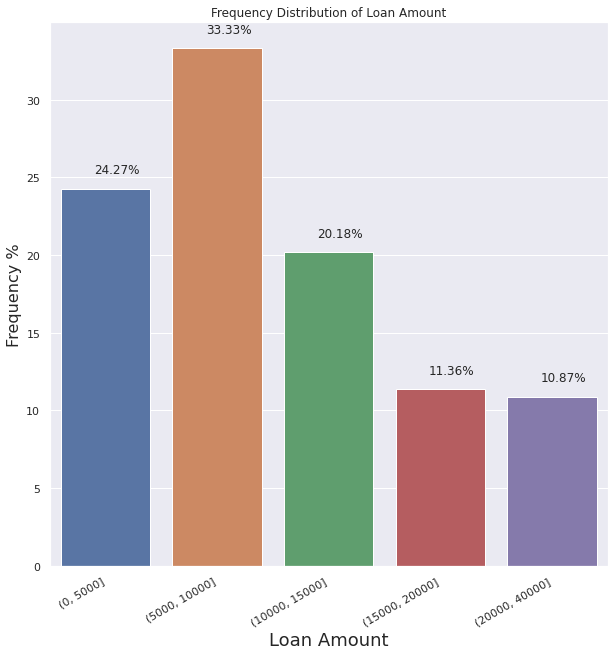

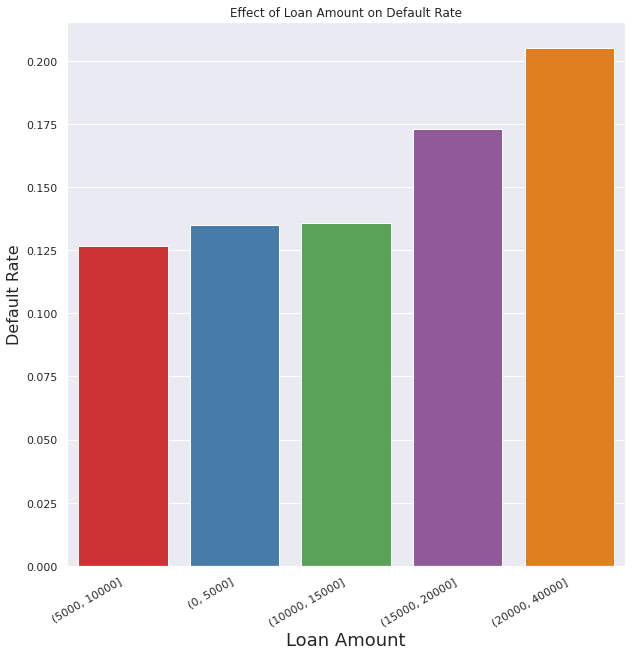

In [75]:
#Analysis of Loan Amount
frequencyDist("loan_amnt_bin","Loan Amount")
univariate('loan_amnt_bin',"Loan Amount")

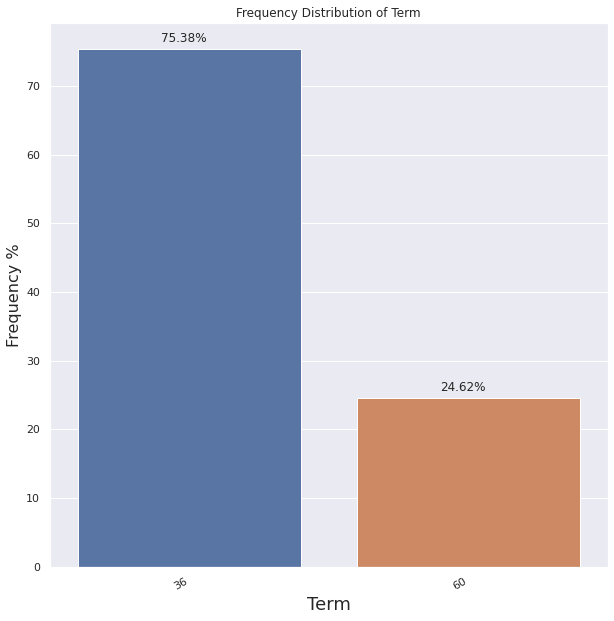

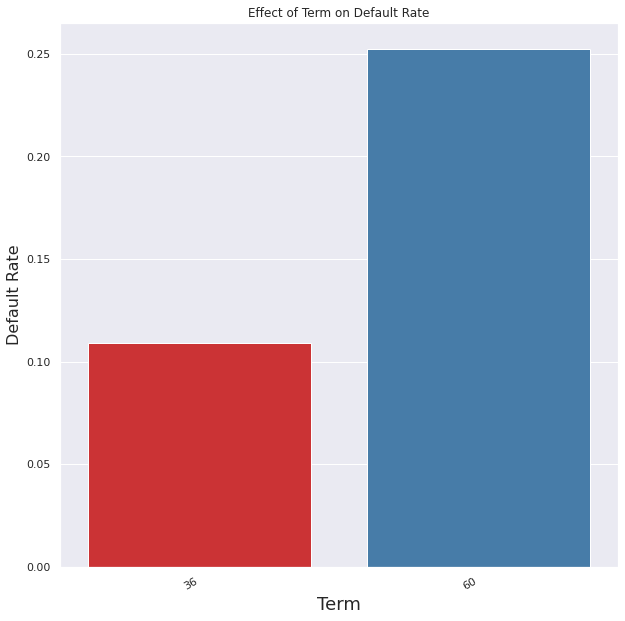

In [76]:
#Analysis of Loan Term
frequencyDist("term","Term")
univariate('term',"Term")

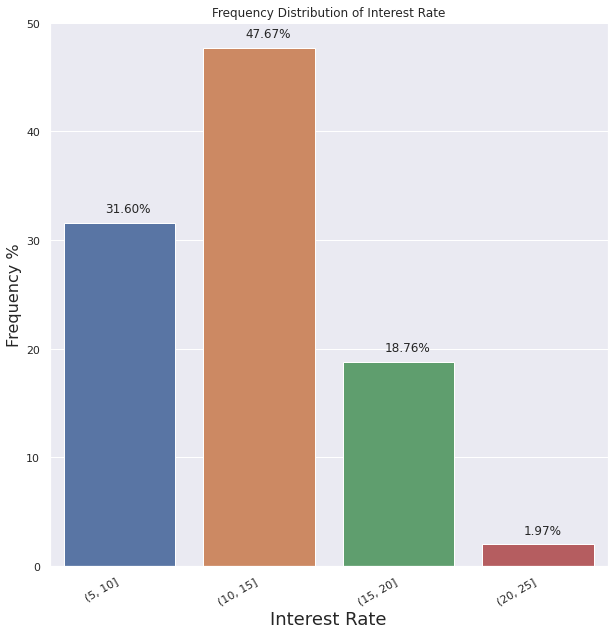

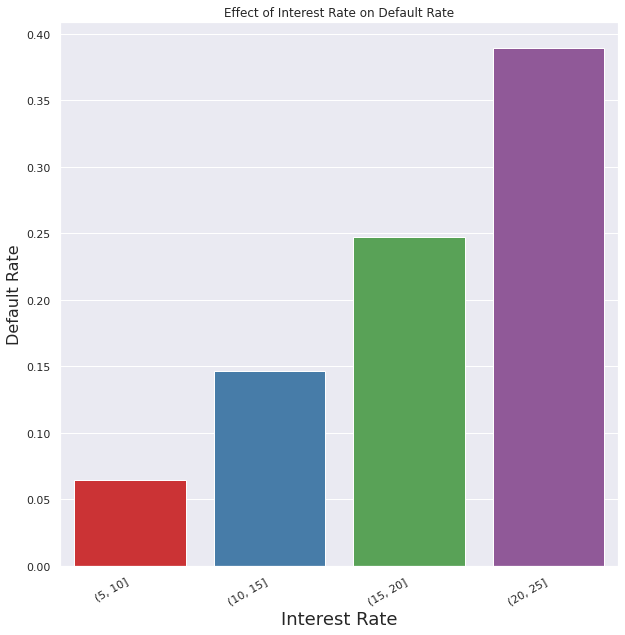

In [77]:
#Analysis of Interest Rate
frequencyDist("int_rate_bin","Interest Rate")
univariate('int_rate_bin', 'Interest Rate')

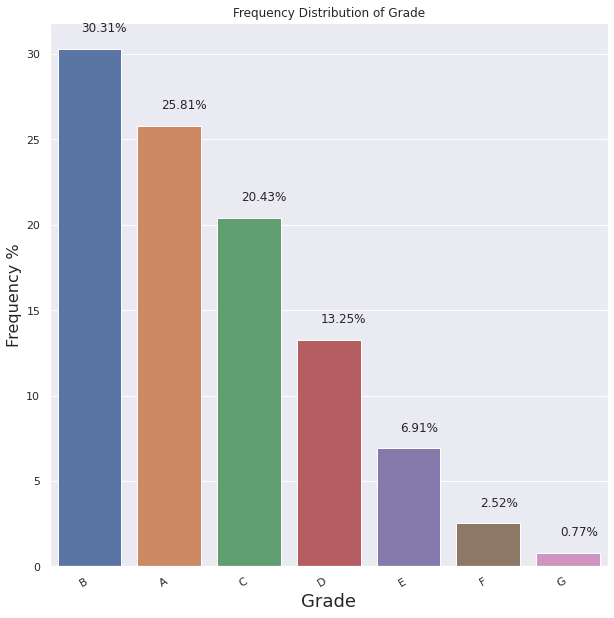

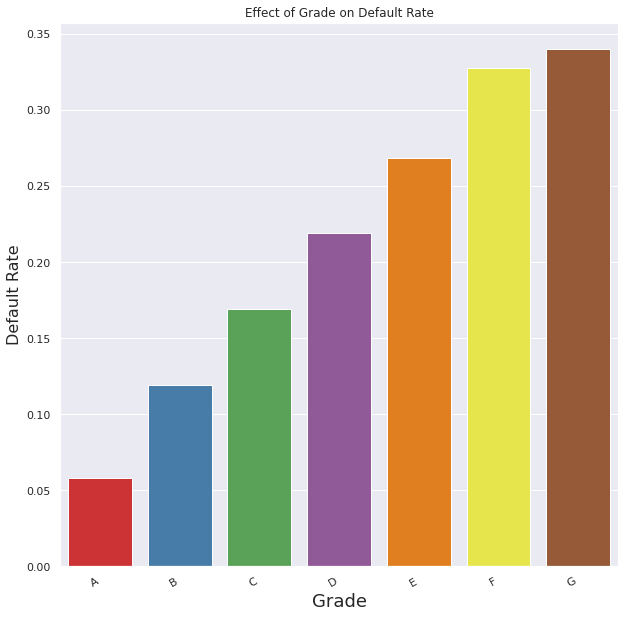

In [78]:
#Analysis of Grade
frequencyDist("grade", "Grade")
univariate('grade', "Grade")

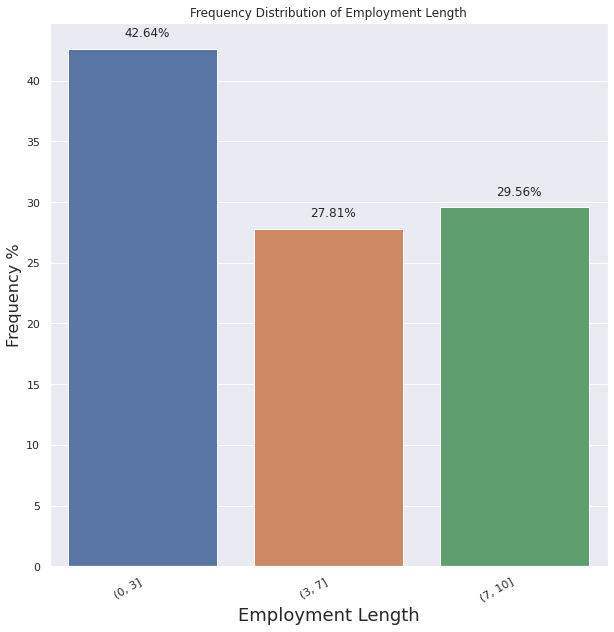

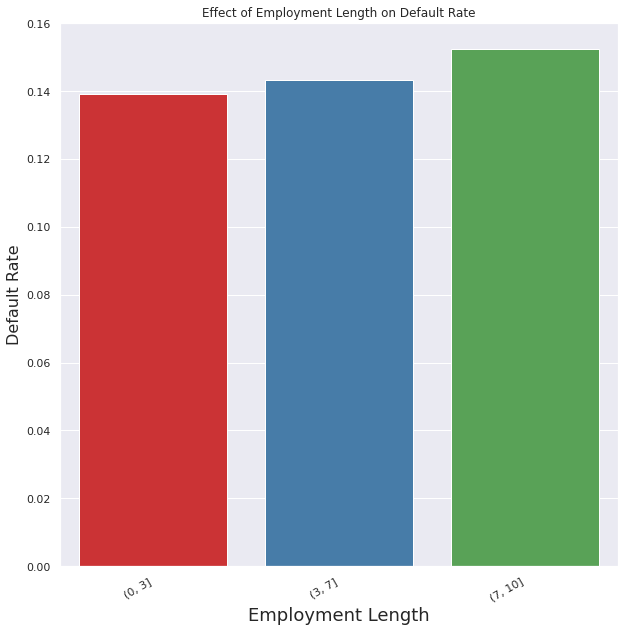

In [79]:
#Analysis of Employment Lengt
frequencyDist("emp_length_bin","Employment Length")
univariate('emp_length_bin',"Employment Length")

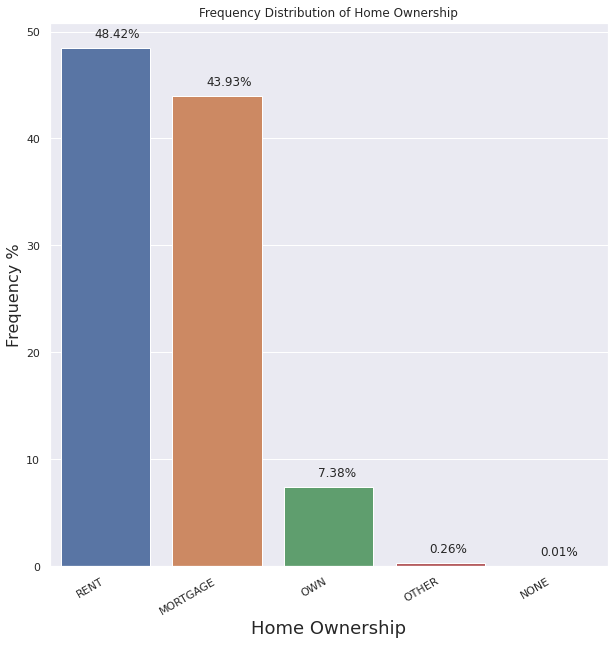

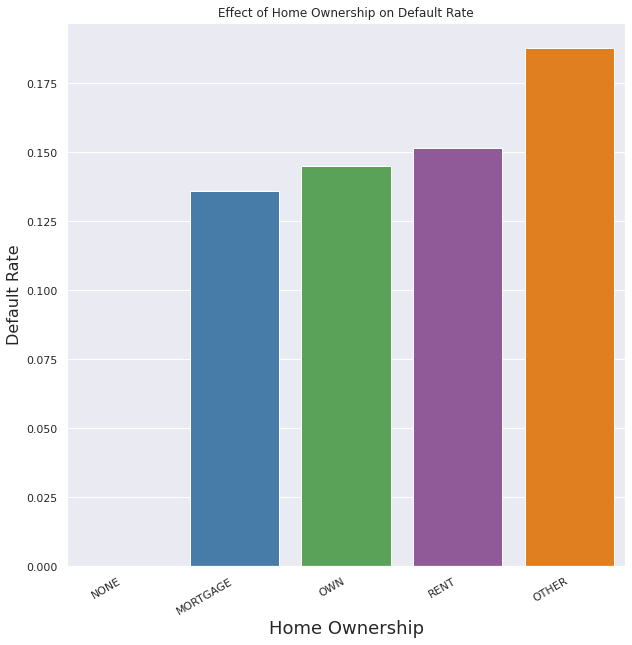

In [80]:
#Analysis of Home Ownership
frequencyDist("home_ownership","Home Ownership")
univariate('home_ownership',"Home Ownership")

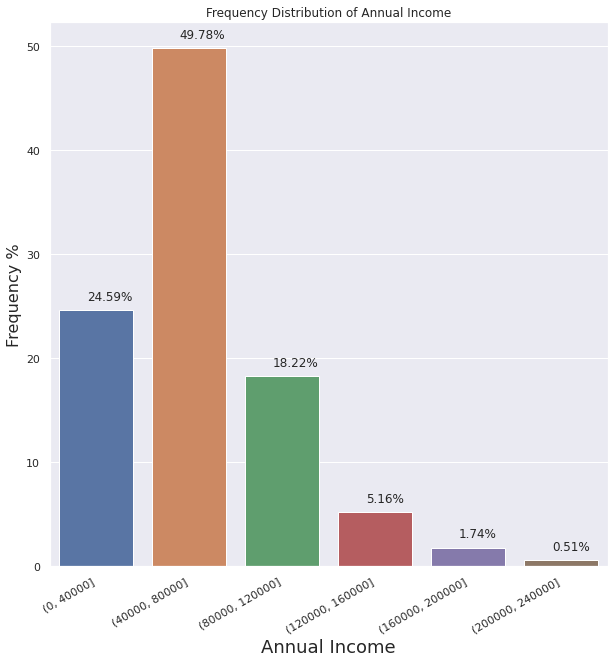

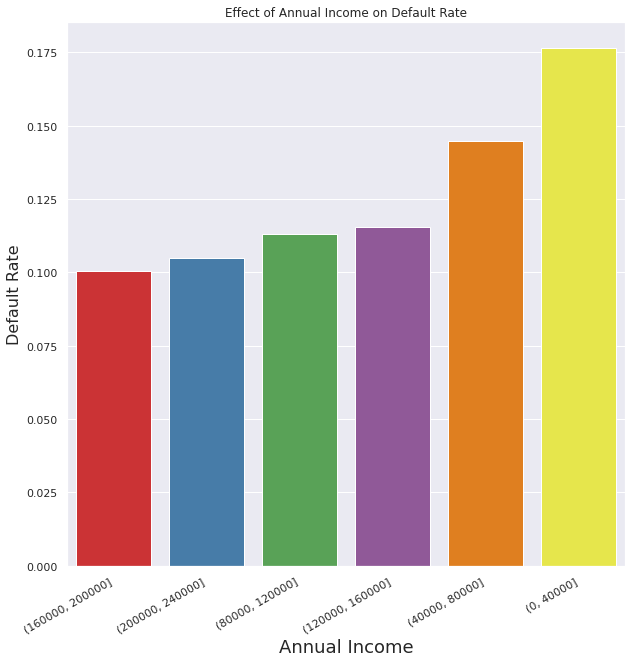

In [81]:
#Analysis of Annual Income
frequencyDist("annual_inc_bin","Annual Income")
univariate('annual_inc_bin',"Annual Income")

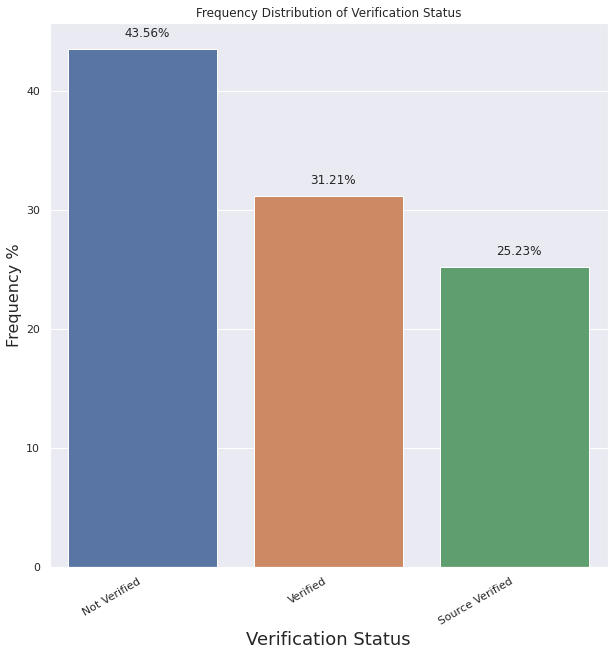

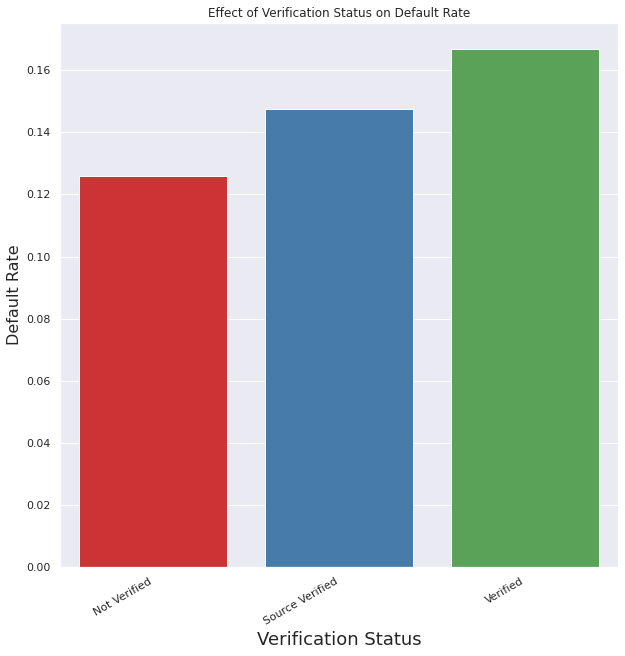

In [82]:
#Analysis of Verification Status
frequencyDist("verification_status","Verification Status")
univariate('verification_status',"Verification Status")

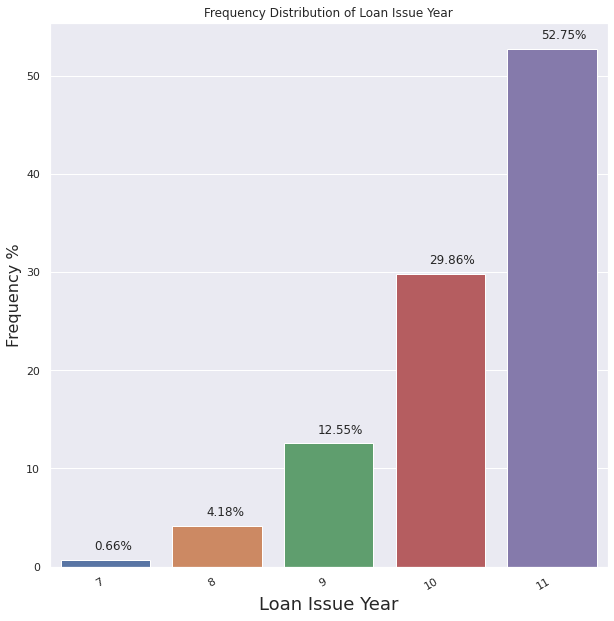

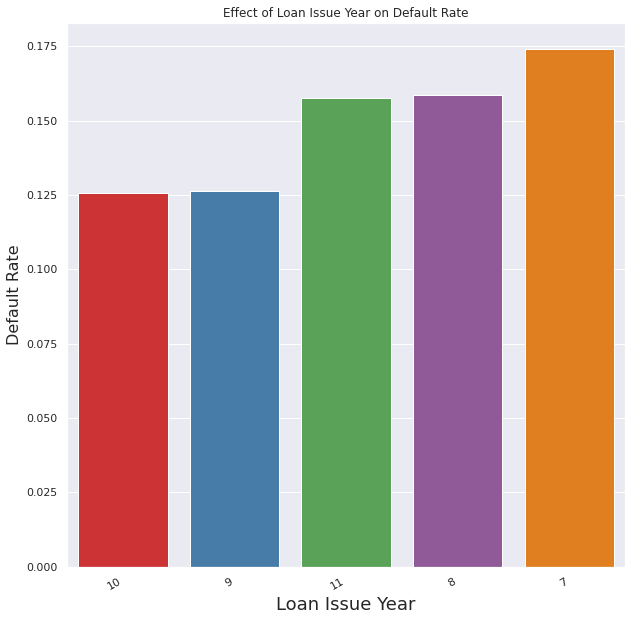

In [83]:
#Analysis of Issue year
frequencyDist("issue_year","Loan Issue Year")
univariate("issue_year", "Loan Issue Year")

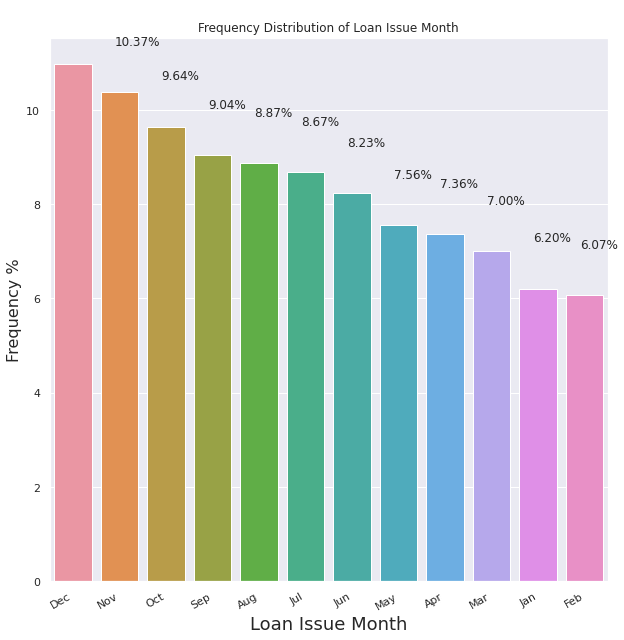

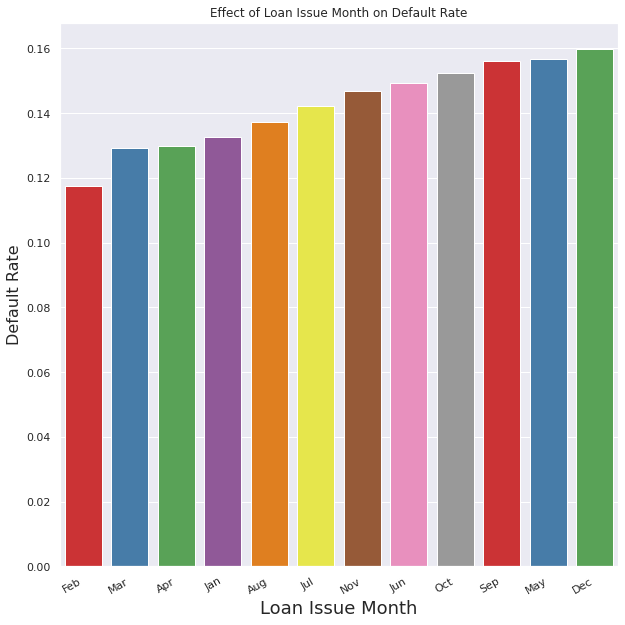

In [84]:
#Analysis of Issue Month
frequencyDist("issue_month","Loan Issue Month")
univariate("issue_month", "Loan Issue Month")

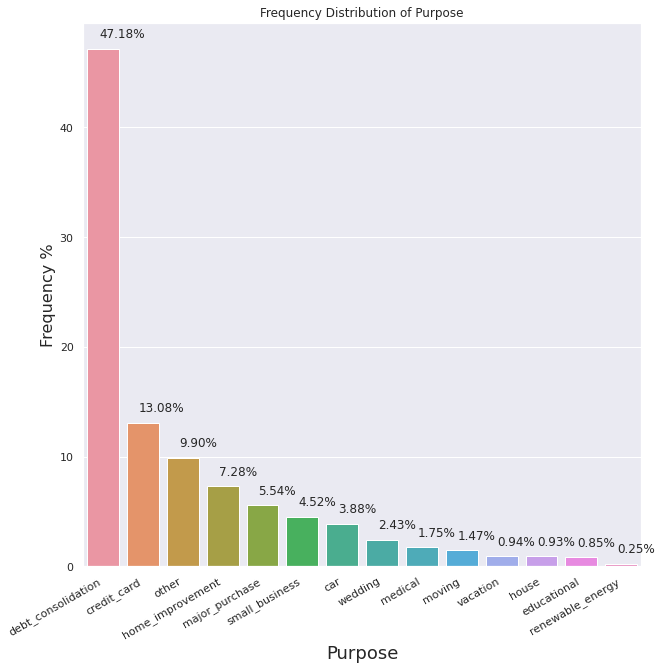

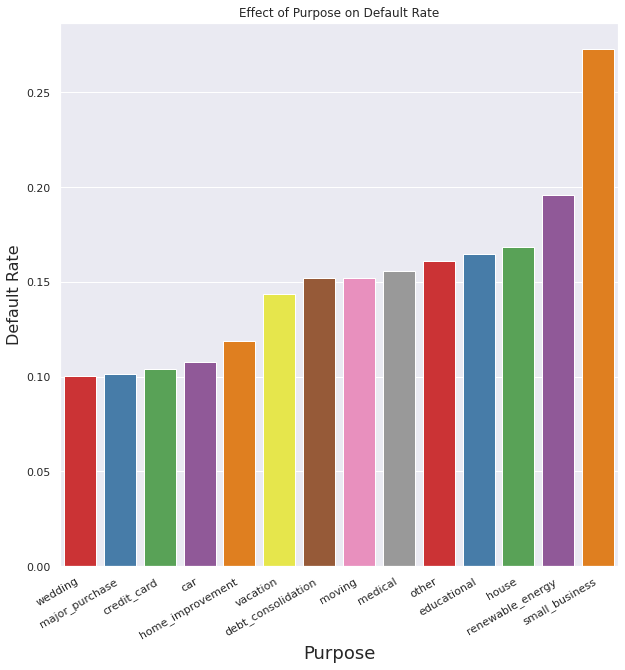

In [85]:
#Analysis of purpose
frequencyDist("purpose","Purpose")
univariate("purpose", "Purpose")

In [133]:
#Getting top 10 states
states = pd.DataFrame(df["addr_state"].value_counts()/len(df)*100)
top10 = states.head(10)
top10

,addr_state
CA,18.031905
NY,9.552632
FL,7.161112
TX,6.929761
NJ,4.694267
PA,3.841498
IL,3.830737
VA,3.577866
GA,3.526753
MA,3.362656


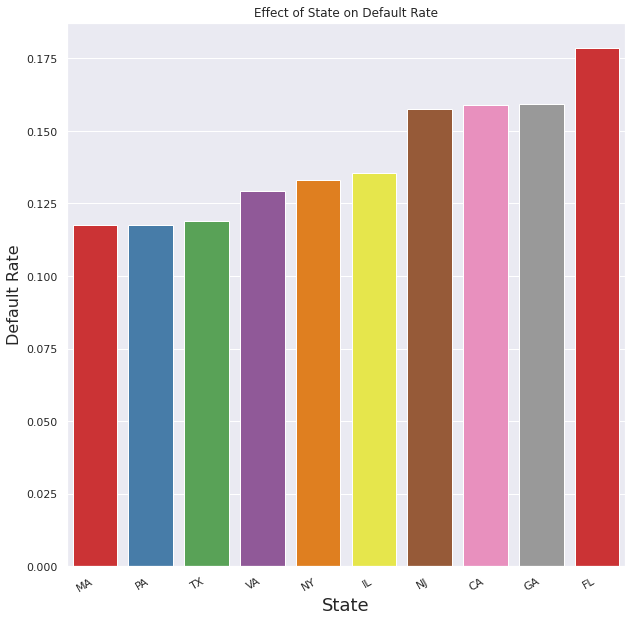

In [125]:
#Defalt Rate of top 10 states
result = df.loc[df["addr_state"].isin(top10.index)].groupby(["addr_state"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status')
p = sns.barplot(x="addr_state", y='loan_status', data=df.loc[df["addr_state"].isin(top10.index)], estimator=np.mean,palette='Set1',ci=None,order=result["addr_state"])
p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
plt.xlabel("State", fontsize=18)
plt.ylabel('Default Rate', fontsize=16)
plt.title('Effect of {} on Default Rate'.format("State"))
plt.show()

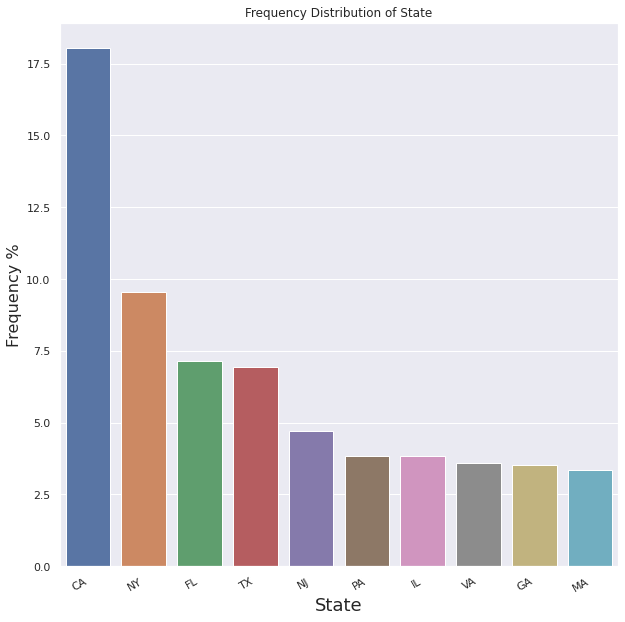

In [132]:
#Frequency distribution of top 10 states
ax = sns.barplot(x=top10.index,y="addr_state",data=top10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
plt.xlabel("State", fontsize=18)
plt.ylabel('Frequency %', fontsize=16)
plt.title('Frequency Distribution of {}'.format("State"))
plt.show()

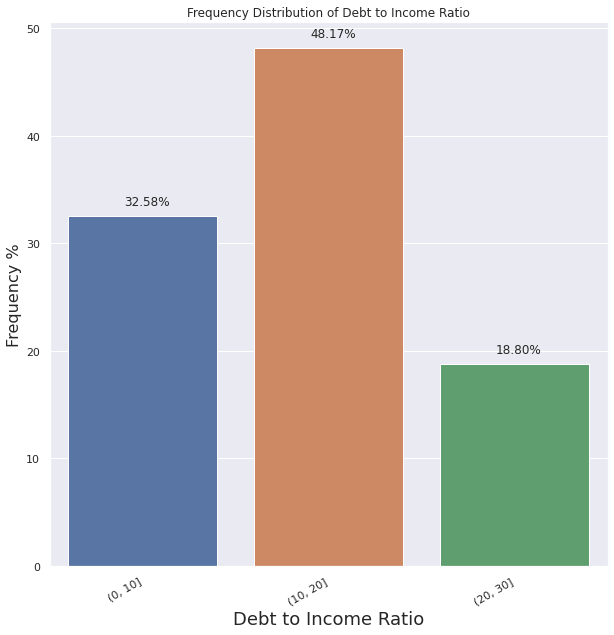

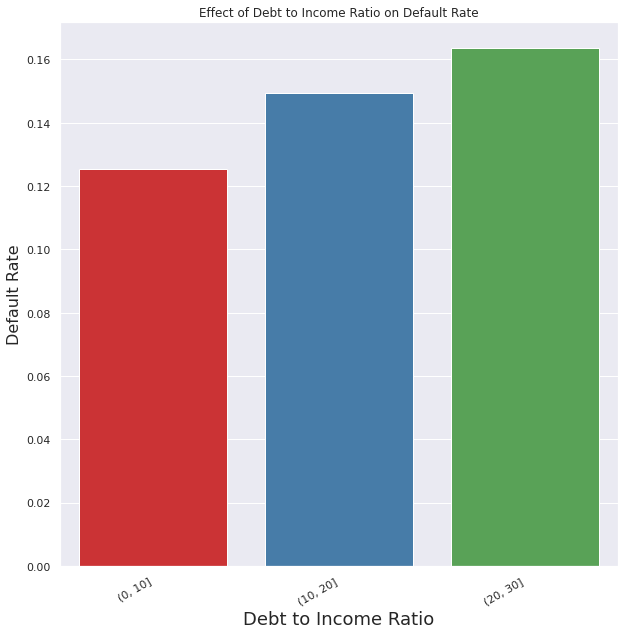

In [87]:
#Analysis of DTI
frequencyDist("dti_bin","Debt to Income Ratio")
univariate('dti_bin',"Debt to Income Ratio")

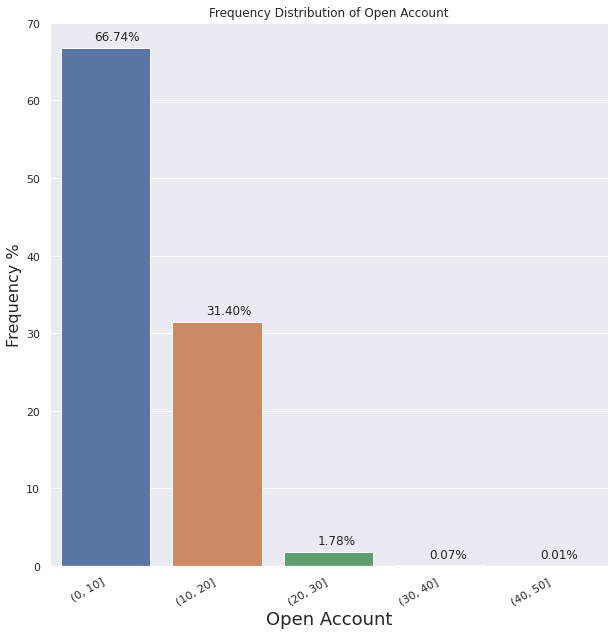

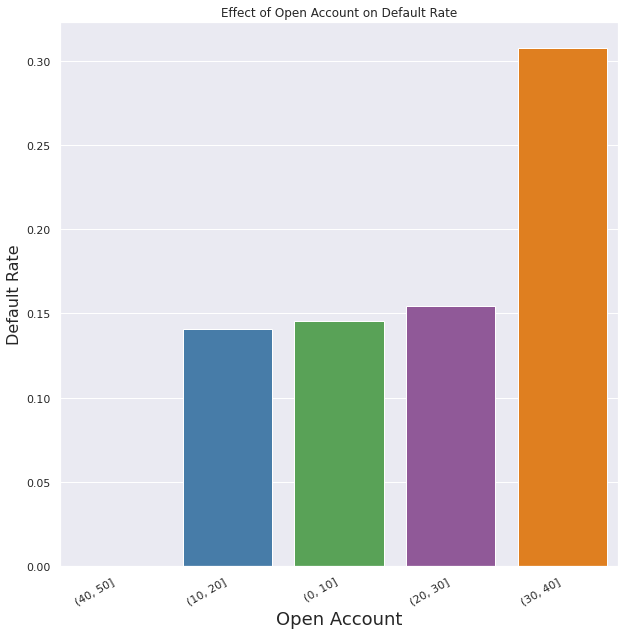

In [88]:
#Analysis of Open Account
frequencyDist("open_acc_bin","Open Account")
univariate('open_acc_bin',"Open Account")

## Bivariate Analysis

In [134]:
#To get the Corelation
df.corr()

,id,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,issue_year
id,1.000000,0.123392,0.181025,0.057395,0.077795,0.109580,0.034897,0.042592,0.091340,0.017711,0.848144
loan_amnt,0.123392,1.000000,0.347447,0.296455,0.931098,0.148828,0.412178,0.064965,0.070918,0.171150,0.113140
term,0.181025,0.347447,1.000000,0.439440,0.088707,0.105447,0.072589,0.176019,0.079515,0.044975,0.242163
int_rate,0.057395,0.296455,0.439440,1.000000,0.272861,-0.000669,0.063253,0.214626,0.114593,0.003650,0.042691
installment,0.077795,0.931098,0.088707,0.272861,1.000000,0.120898,0.408688,0.031707,0.060419,0.166505,0.055287
emp_length,0.109580,0.148828,0.105447,-0.000669,0.120898,1.000000,0.172978,0.017193,0.051683,0.096683,0.116391
annual_inc,0.034897,0.412178,0.072589,0.063253,0.408688,0.172978,1.000000,-0.059898,-0.112099,0.259267,0.038999
loan_status,0.042592,0.064965,0.176019,0.214626,0.031707,0.017193,-0.059898,1.000000,0.041832,-0.006387,0.023751
dti,0.091340,0.070918,0.079515,0.114593,0.060419,0.051683,-0.112099,0.041832,1.000000,0.293513,0.093698
open_acc,0.017711,0.171150,0.044975,0.003650,0.166505,0.096683,0.259267,-0.006387,0.293513,1.000000,0.012909


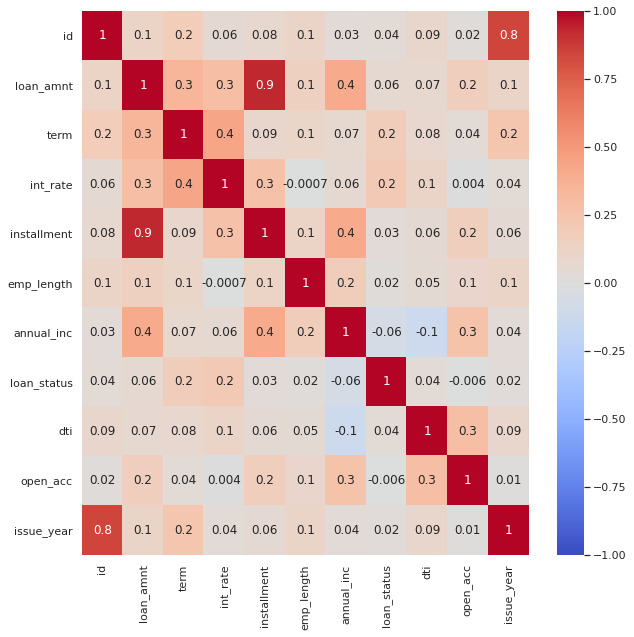

In [135]:
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [136]:
#Funciton for Bivariate Analysis
def bivariate(x_axis, y_axis,hue_term,df, estimator_term, title):
    plt.figure(figsize=(12, 10))
    result = df.groupby([x_axis])[y_axis].aggregate(np.mean).reset_index().sort_values(y_axis)
    p = sns.barplot(x=x_axis, y= y_axis, hue = hue_term, data=df, estimator=np.mean,palette='Set1', order=result[x_axis], ci=None)
    p.set_xticklabels(p.get_xticklabels(),rotation=30)
    plt.title(title)
    plt.show()

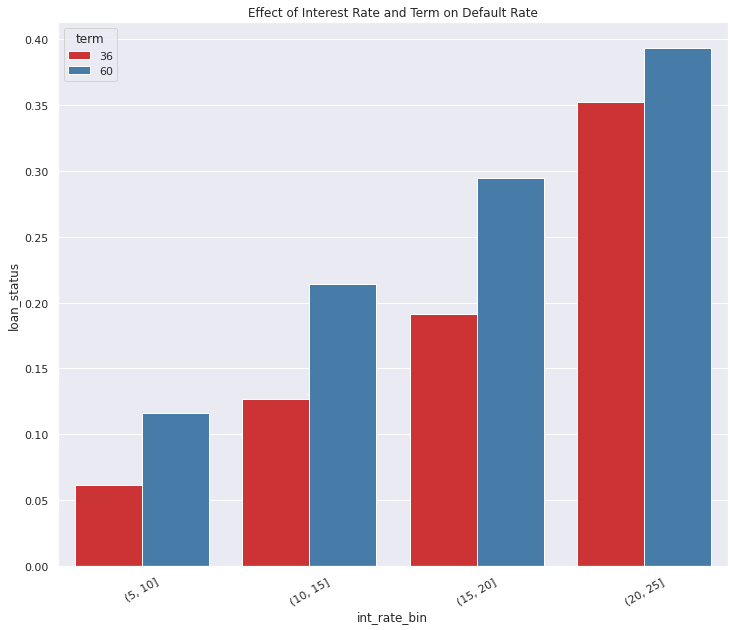

In [140]:
#Relation of term with interest rate
bivariate('int_rate_bin','loan_status','term',df,np.mean,'Effect of Interest Rate and Term on Default Rate')

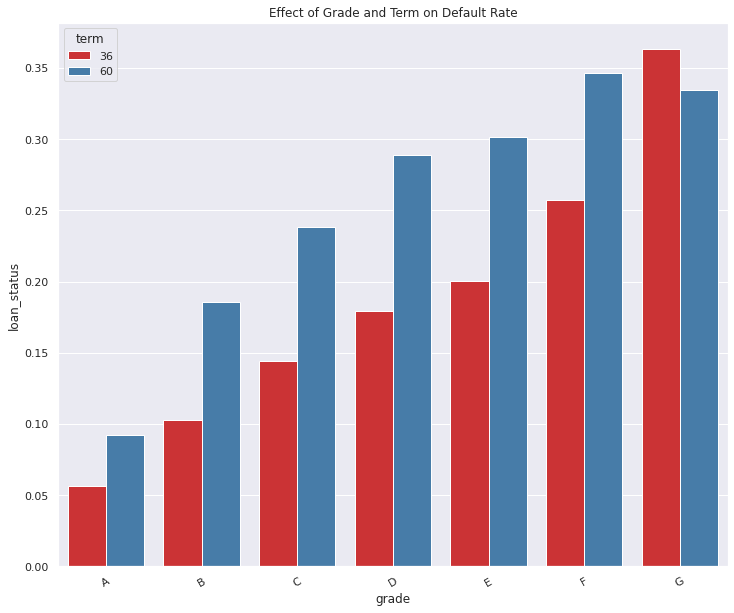

In [139]:
#Relation of term with Grade
bivariate('grade','loan_status','term',df,np.mean,'Effect of Grade and Term on Default Rate')

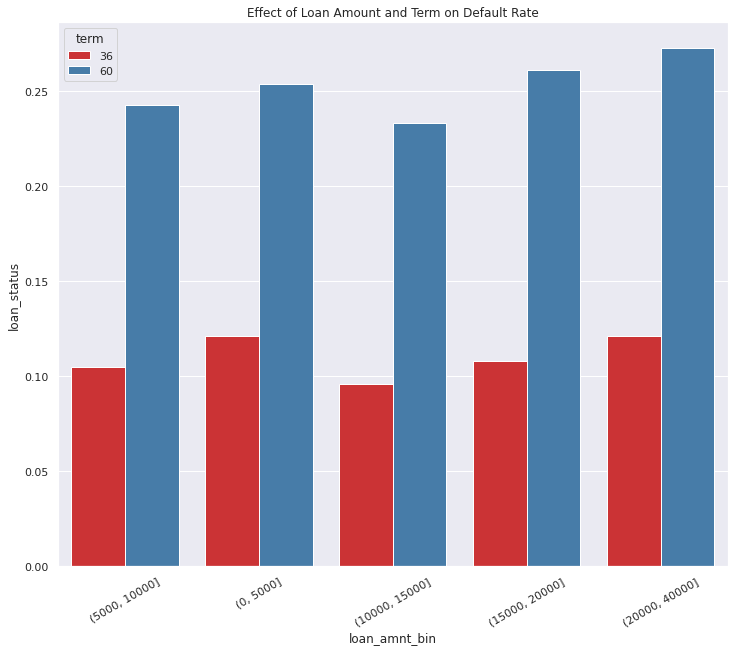

In [141]:
#Relation of term with Grade
bivariate('loan_amnt_bin','loan_status','term',df,np.mean,'Effect of Loan Amount and Term on Default Rate')

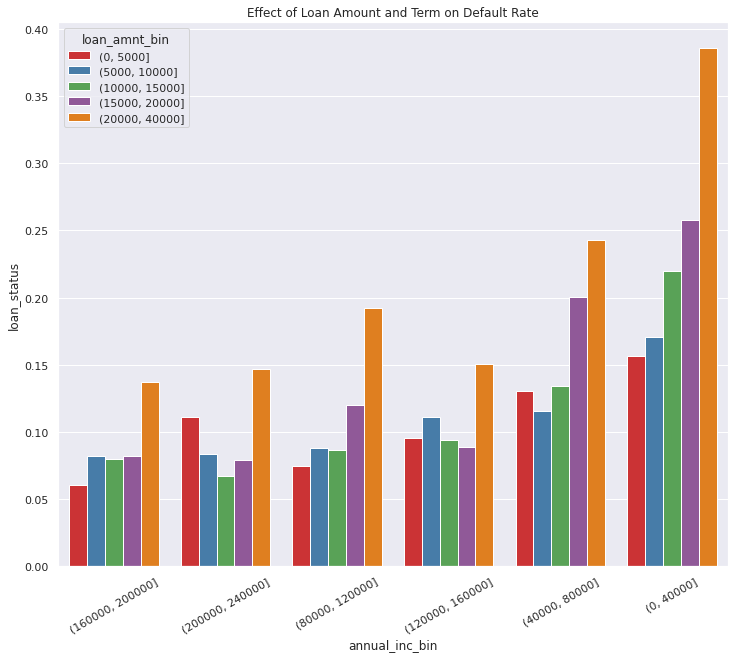

In [142]:
#Relation of term with Grade
bivariate('annual_inc_bin','loan_status','loan_amnt_bin',df,np.mean,'Effect of Loan Amount and Term on Default Rate')

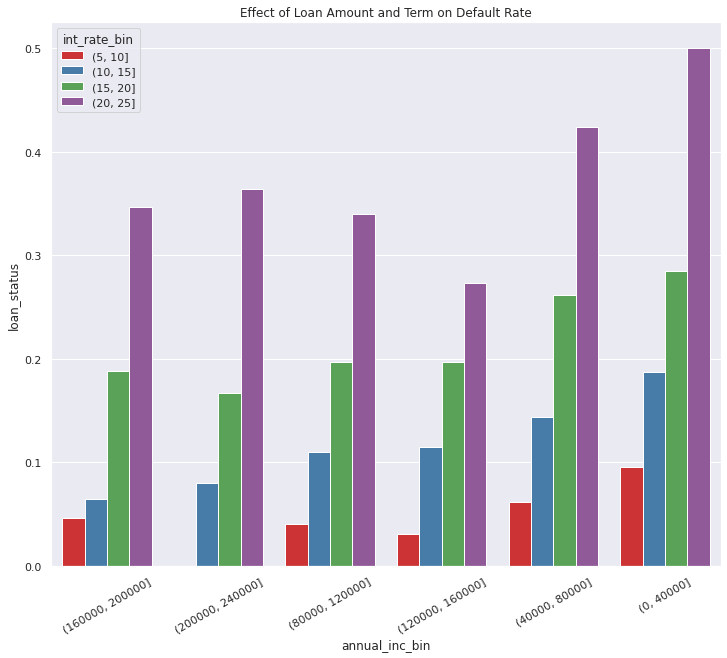

In [143]:
#Relation of term with Grade
bivariate('annual_inc_bin','loan_status','int_rate_bin',df,np.mean,'Effect of Loan Amount and Term on Default Rate')

In [ ]:
#Relation of term with Grade
bivariate('annual_inc_bin','loan_status','int_rate_bin',df,np.mean,'Effect of Loan Amount and Term on Default Rate')

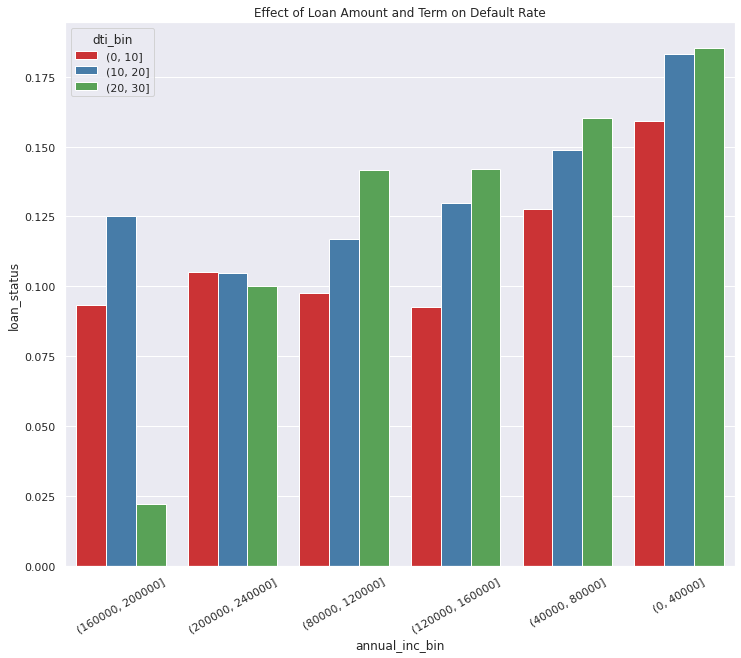

In [145]:
#Relation of term with Grade
bivariate('annual_inc_bin','loan_status','dti_bin',df,np.mean,'Effect of Loan Amount and Term on Default Rate')

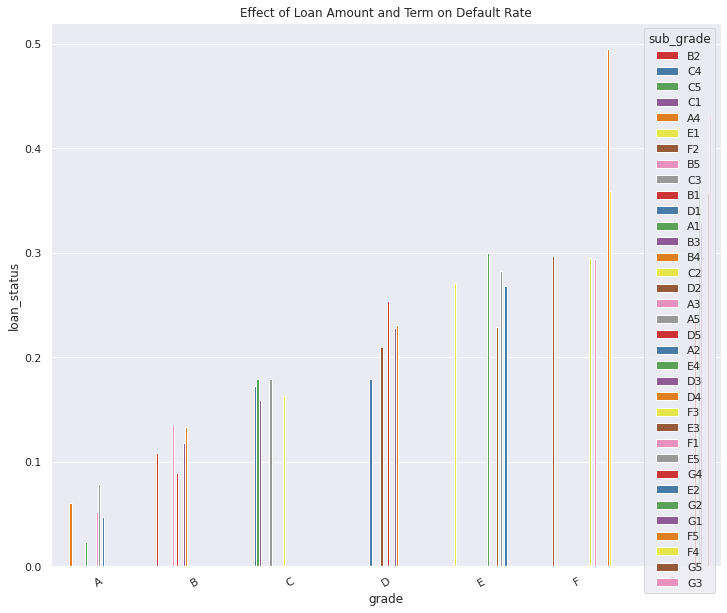

In [146]:
#Relation of term with Grade
bivariate('grade','loan_status','sub_grade',df,np.mean,'Effect of Loan Amount and Term on Default Rate')

## To get Significant Columns

In [211]:
#Columns to consider
column_list=['term','grade','sub_grade','verification_status','purpose','issue_month','issue_year','emp_length_bin','loan_amnt_bin','int_rate_bin','annual_inc_bin','dti_bin']
column_list

['term',
 'grade',
 'sub_grade',
 'verification_status',
 'purpose',
 'issue_month',
 'issue_year',
 'emp_length_bin',
 'loan_amnt_bin',
 'int_rate_bin',
 'annual_inc_bin',
 'dti_bin']

In [214]:
sugnificnt_columns = pd.DataFrame(columns=['column', 'significance_value'])  
sugnificnt_columns.head()
#Method to get Significance value
def getsignificance(index,col):
    a = pd.pivot_table(df, values ='loan_status', index =[col], aggfunc = np.mean)
    print(a)
    sugnificnt_columns.loc[index,"column"] = col
    sugnificnt_columns.loc[index,"significance_value"] = a["loan_status"].max() - a["loan_status"].min()
for i in range(len(column_list)):
    getsignificance(i,column_list[i])

      loan_status
term             
36       0.108851
60       0.252376
       loan_status
grade             
A         0.058063
B         0.119365
C         0.168971
D         0.219334
E         0.268587
F         0.327292
G         0.340278
           loan_status
sub_grade             
A1            0.022967
A2            0.047486
A3            0.052023
A4            0.060584
A5            0.079219
B1            0.089421
B2            0.108221
B3            0.118232
B4            0.133418
B5            0.136006
C1            0.159057
C2            0.163038
C3            0.179291
C4            0.172797
C5            0.179441
D1            0.179515
D2            0.209847
D3            0.228412
D4            0.231285
D5            0.253416
E1            0.271041
E2            0.268007
E3            0.229209
E4            0.299517
E5            0.282967
F1            0.293919
F2            0.296460
F3            0.295181
F4            0.358621
F5            0.495238
G1            0.32967

In [215]:
#Significant Columns
sugnificnt_columns.sort_values(by="significance_value",ascending=False)

,column,significance_value
2,sub_grade,0.472272
9,int_rate_bin,0.324812
1,grade,0.282215
4,purpose,0.172499
0,term,0.143525
8,loan_amnt_bin,0.0784571
10,annual_inc_bin,0.0760783
6,issue_year,0.0485148
5,issue_month,0.0426101
3,verification_status,0.0409414


### Conclusion
Subgrade is the extension over grade. We are dropping subgrade. Below are the most significsnt variables:
1. int_rate
2. grade
3. purpose
4. term
5. loan_amnt_bin